# 1. Data Cleaning

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#ignore any warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

### 1.1. Import Data

In [48]:
from urllib.request import urlopen
from zipfile import ZipFile

zipurl = 'https://raw.githubusercontent.com/eozhisarcikli/credit-card-fraud-detection/main/data.zip'
zipresp = urlopen(zipurl) # Create a new file on the hard drive
tempzip = open("/tmp/tempfile.zip", "wb") # Write the contents of the downloaded file into the new file
tempzip.write(zipresp.read()) # Close the newly-created file
tempzip.close() # Re-open the newly-created file with ZipFile()
zf = ZipFile("/tmp/tempfile.zip") # Extract its contents into <extraction_path>
zf.extractall(path = '') # note that extractall will automatically create the path, left blank so it's in working directory
zf.close() # close the ZipFile instance

card = pd.read_csv('creditcard.csv')
card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [49]:
card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### 1.2. Check for NULL/MISSING

In [50]:
#percentage of missing values in each column
round(100 * (card.isnull().sum()/len(card)),2).sort_values(ascending=False)

Class     0.0
V14       0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V15       0.0
Amount    0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Time      0.0
dtype: float64

In [51]:
#percentage of missing values in each row
round(100 * (card.isnull().sum(axis=1)/len(card)),2).sort_values(ascending=False)

284806    0.0
94937     0.0
94931     0.0
94932     0.0
94933     0.0
         ... 
189864    0.0
189863    0.0
189862    0.0
189861    0.0
0         0.0
Length: 284807, dtype: float64

There are no missing or null values either in columns or rows

### 1.3. Check for Duplicates

In [52]:
card_d=card.copy() #create a copy
card_d.drop_duplicates(subset=None, inplace=True) #drop duplicates from copied data

In [53]:
print("Shape of Data(original):      ", card.shape)
print("Shape of Data(no duplicates): ", card_d.shape)

Shape of Data(original):       (284807, 31)
Shape of Data(no duplicates):  (283726, 31)


In [54]:
card=card_d #assigning removed duplicate dataset to original 
card.shape #check the final version of data set

(283726, 31)

Duplicates are found in the records and removed

# 2. Data Analysis

In [55]:
card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

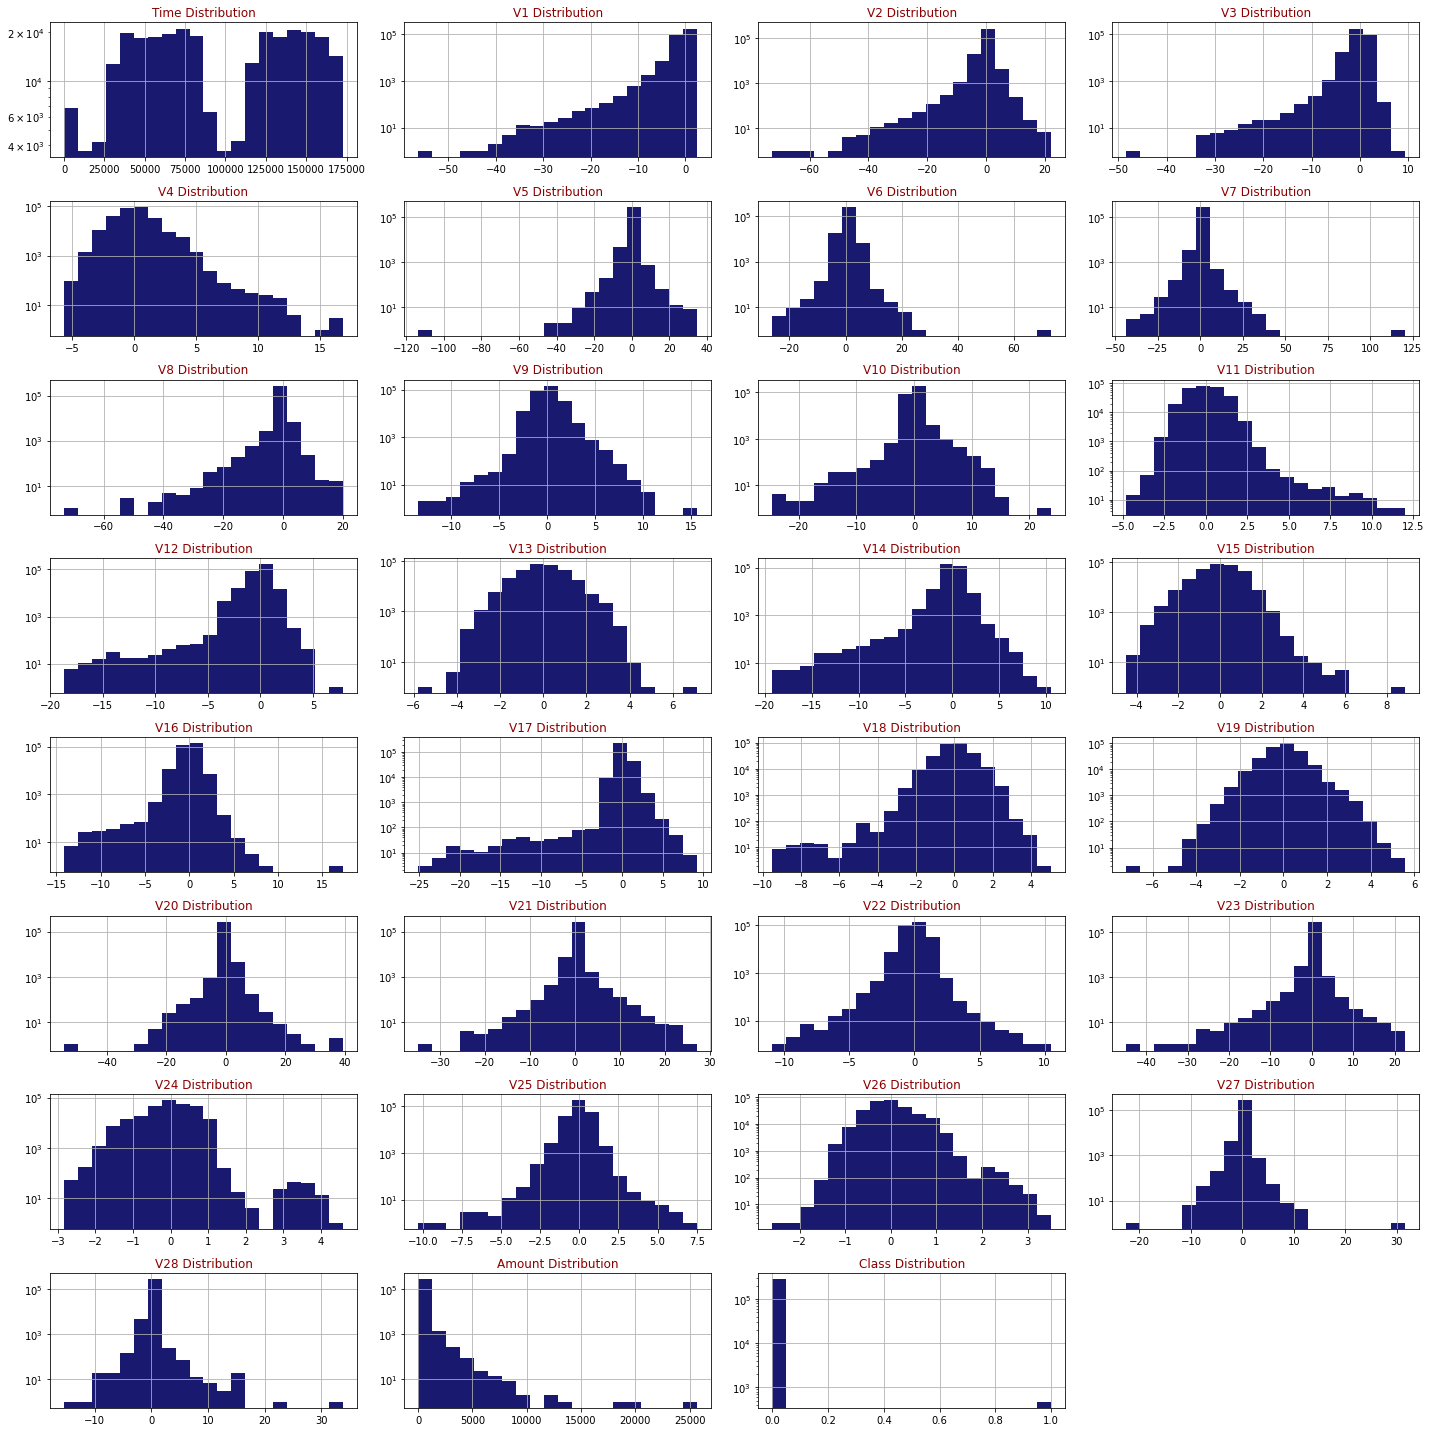

In [56]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()
    
draw_histograms(card,card.columns,8,4)

As you can see most of these variables look like normal distributions with either left or right skewed. No uniform distributions as well except Time, which is ok.

0    283253
1       473
Name: Class, dtype: int64

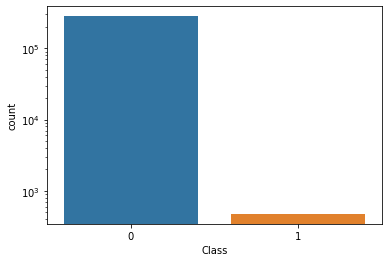

In [57]:
ax=sns.countplot(x='Class',data=card).set_yscale('log')
card.Class.value_counts()

There are 283253 records with no fraud status and 473 records with fraud status.

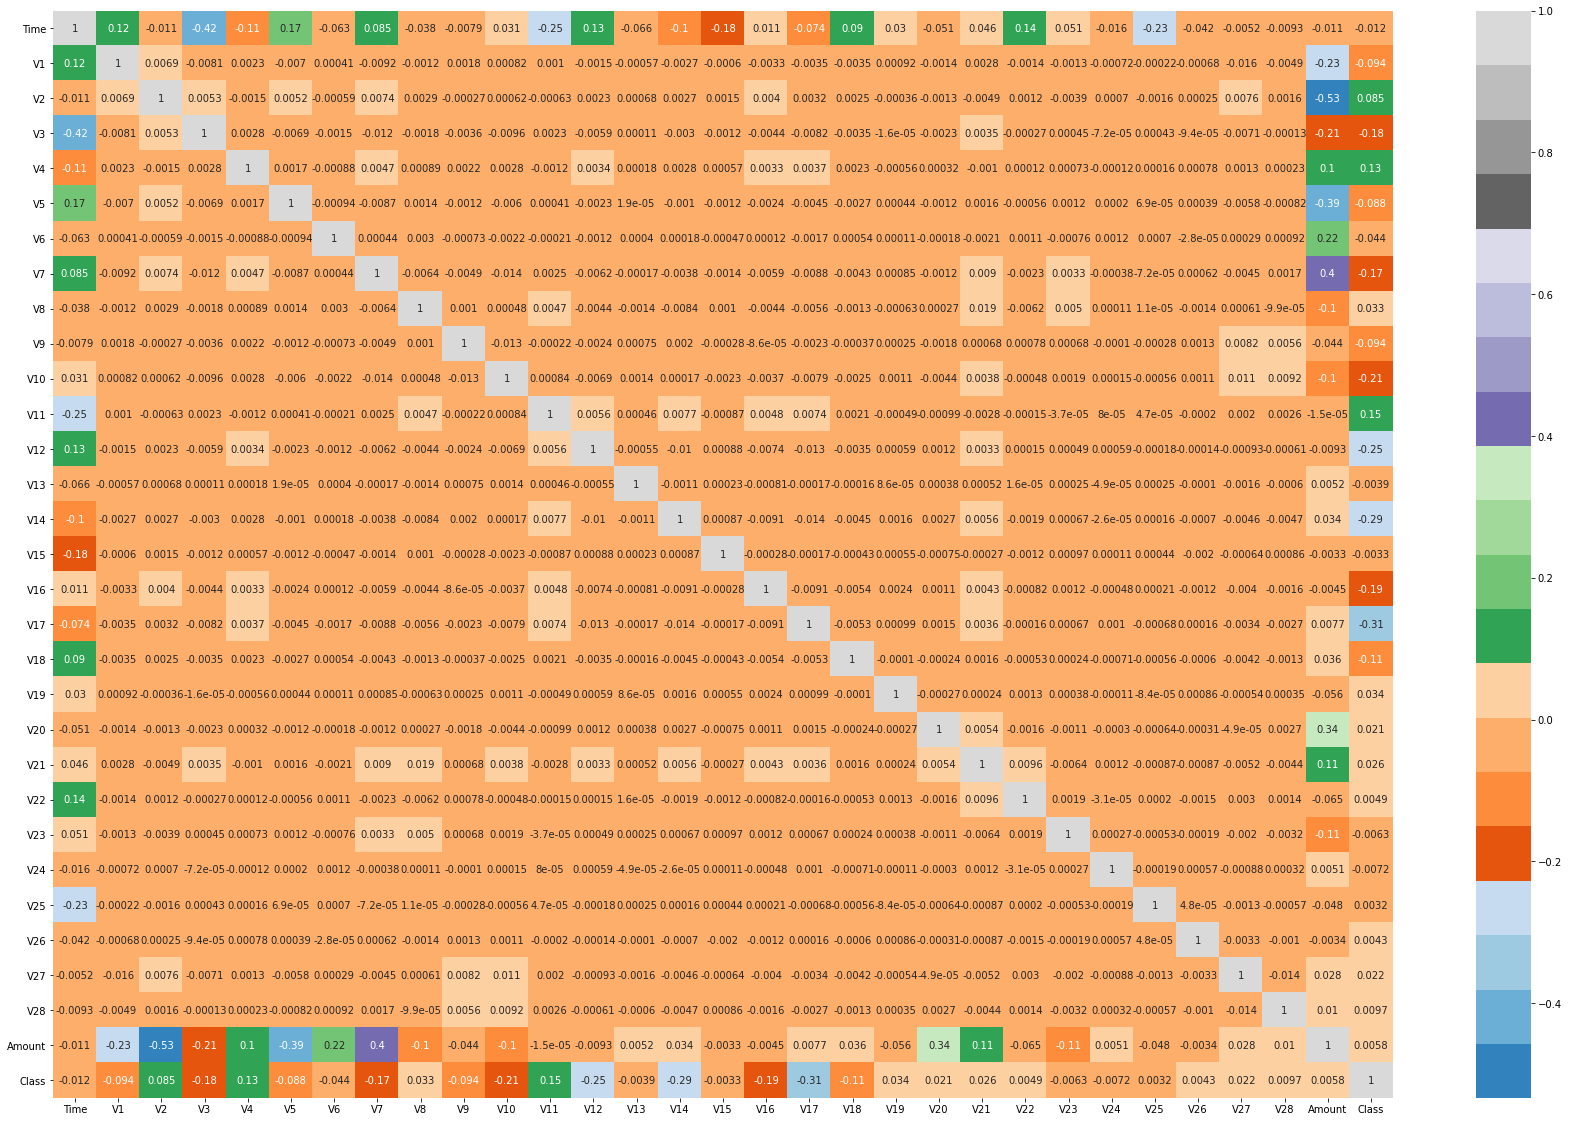

In [58]:
plt.figure(figsize = (30,20))
sns.heatmap(card.corr(), annot = True, cmap="tab20c")
plt.show()

The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable. Maximum correlation is 0.4 which is between Amount and V7. Class is more important than Amount. Class has some strong negative and positive correlation with a couple of variables.

# 3. Modelling

### 3.1. Feature Selection

In [59]:
estimators = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'] #because 'Amount' is not standardized uniform variable, it shouldn't be included

X1 = card[estimators] #features
y = card['Class'] #target

In [60]:
import statsmodels.api as sm

X = sm.add_constant(X1)
reg_logit = sm.Logit(y,X)
results_logit = reg_logit.fit()

Optimization terminated successfully.
         Current function value: 0.003937
         Iterations 13


In [61]:
results_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               283726
Model:                          Logit   Df Residuals:                   283696
Method:                           MLE   Df Model:                           29
Date:                Sun, 04 Apr 2021   Pseudo R-squ.:                  0.6807
Time:                        12:30:54   Log-Likelihood:                -1117.0
converged:                       True   LL-Null:                       -3498.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.2851      0.246    -33.622      0.000      -8.768      -7.802
Time       -3.694e-06   2.26e-06     -1.631      0.103   -8.13e-06    7.44e-07
V1             0.0613      0.041      1.512      0.130      -0.018       0.141
V2            -0.0445      0.049     -0.900      0.368      -0.141       0.052
V3            -0.0332      0.052     -0.639      0.523      -0.135       0.069
V4             0.7036      0.073      9.576      0.000       0.560       0.848
V5             0.0648      0.063      1.032      0.302      -0.058       0.188
V6            -0.0887      0.074     -1.196      0.232      -0.234       0.057
V7             0.0091      0.056      0.161      0.872      -0.101       0.119
V8            -0.2032      0.029     -7.062      0.000      -0.260      -0.147
V9            -0.2629      0.113     -2.337      0.019      -0.483      -0.042
V10           -0.7960      0.101     -7.909      0.000      -0.993      -0.599
V11           -0.0516      0.082     -0.632      0.527      -0.212       0.108
V12            0.0604      0.087      0.696      0.486      -0.110       0.231
V13           -0.3272      0.081     -4.022      0.000      -0.487      -0.168
V14           -0.5520      0.063     -8.736      0.000      -0.676      -0.428
V15           -0.1282      0.086     -1.486      0.137      -0.297       0.041
V16           -0.2252      0.124     -1.819      0.069      -0.468       0.017
V17           -0.0202      0.071     -0.285      0.775      -0.159       0.118
V18            0.0231      0.128      0.180      0.857      -0.227       0.273
V19            0.0725      0.097      0.751      0.453      -0.117       0.262
V20           -0.3000      0.068     -4.434      0.000      -0.433      -0.167
V21            0.4202      0.060      6.992      0.000       0.302       0.538
V22            0.6256      0.134      4.655      0.000       0.362       0.889
V23           -0.1188      0.063     -1.875      0.061      -0.243       0.005
V24            0.1355      0.149      0.912      0.362      -0.156       0.427
V25           -0.0677      0.134     -0.506      0.613      -0.330       0.194
V26            0.0011      0.192      0.006      0.996      -0.375       0.377
V27           -0.6836      0.138     -4.960      0.000      -0.954      -0.413
V28           -0.2479      0.098     -2.540      0.011      -0.439      -0.057
==============================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Some of the attributes above have higher P value than the preferred alpha(5%) so they are not statistically significant.

Backward elemination approach will be used here to remove those attributes with highest P value one at a time followed by running the regression repeatedly until all attributes have P values less than 0.05(alpha).

Typically, when an independent variable is not significant (i.e. P > 0.05), you at least consider removing it from the model. You don’t want to include too many variables that are not significant because it reduces the precision of your model.

In [62]:
#Backward elemination approach
def back_feature_elem (data_frame, dep_var, col_list):

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result = back_feature_elem(X, card.Class, X1.columns)


In [63]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               283726
Model:                          Logit   Df Residuals:                   283701
Method:                           MLE   Df Model:                           24
Date:                Sun, 04 Apr 2021   Pseudo R-squ.:                 0.03183
Time:                        12:31:07   Log-Likelihood:                -3386.9
converged:                       True   LL-Null:                       -3498.2
Covariance Type:            nonrobust   LLR p-value:                 3.947e-34
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Time          -0.0001   1.43e-06    -85.924      0.000      -0.000      -0.000
V1             0.8891      0.028     31.770      0.000       0.834       0.944
V2            -0.4504      0.023    -19.221      0.000      -0.496      -0.405
V3            -1.6025      0.032    -49.412      0.000      -1.666      -1.539
V4             0.1457      0.026      5.709      0.000       0.096       0.196
V5             0.4091      0.024     17.030      0.000       0.362       0.456
V6            -0.3883      0.025    -15.228      0.000      -0.438      -0.338
V7             0.0986      0.028      3.529      0.000       0.044       0.153
V8            -0.3896      0.023    -17.071      0.000      -0.434      -0.345
V9            -0.4603      0.043    -10.647      0.000      -0.545      -0.376
V10           -0.3865      0.051     -7.513      0.000      -0.487      -0.286
V11           -0.6094      0.034    -17.849      0.000      -0.676      -0.542
V12            0.1223      0.034      3.563      0.000       0.055       0.190
V13           -0.4500      0.035    -13.042      0.000      -0.518      -0.382
V14           -0.6893      0.032    -21.761      0.000      -0.751      -0.627
V15           -1.0460      0.041    -25.257      0.000      -1.127      -0.965
V16           -0.2471      0.042     -5.925      0.000      -0.329      -0.165
V17           -0.7008      0.033    -21.372      0.000      -0.765      -0.637
V20           -0.6800      0.050    -13.632      0.000      -0.778      -0.582
V21            0.5744      0.041     13.900      0.000       0.493       0.655
V22            1.3583      0.062     21.848      0.000       1.236       1.480
V23            0.2907      0.055      5.294      0.000       0.183       0.398
V25           -1.9920      0.073    -27.453      0.000      -2.134      -1.850
V26            0.3016      0.072      4.194      0.000       0.161       0.443
V27           -0.7760      0.090     -8.607      0.000      -0.953      -0.599
==============================================================================

Possibly complete quasi-separation: A fraction 0.68 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

As you can see, all P values are close to zero.

### 3.2. Creating Model

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

new_features=card[['Time','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V20','V21', 'V22', 'V23', 'V25', 'V26', 'V27','Class']]
       
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=5,stratify=y)

logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)

# 4. Model Evaluation

### 4.1. Accuracy Score

In [66]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

0.9982377612518945


### 4.2. Confusion Matrix

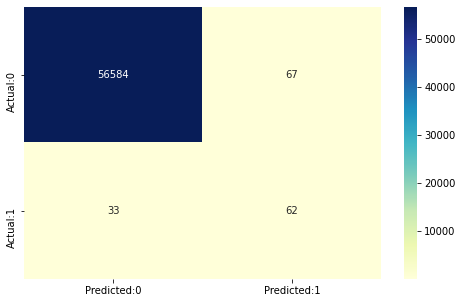

True Negatives(TN) : 56584
True Positives(TP) : 62
False Negatives(FN): 33 (Type II error)
False Positives(FP): 67 (Type I error) 

Accuracy                       = TP+TN/(TP+TN+FP+FN)         = 0.9982377612518945
The Missclassification         = 1-Accuracy                  = 0.001762238748105549
True Positive Rate(Sensitivity)= TP/(TP+FN)                  = 0.6526315789473685
True Negative Rate(Specificity)= TN/(TN+FP)                  = 0.998817320082611
Positive Predictive value      = TP/(TP+FP)                  = 0.4806201550387597
Negative predictive Value      = TN/(TN+FN)                  = 0.9994171361958423
Positive Likelihood Ratio      = Sensitivity/(1-Specificity) = 551.8243519245702
Negative likelihood Ratio      = (1-Sensitivity)/Specificity = 0.34777973315871324


In [104]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]

plt.show()
print("True Negatives(TN) :", TN)
print("True Positives(TP) :", TP)
print("False Negatives(FN):", FN,"(Type II error)")
print("False Positives(FP):", FP,"(Type I error)",'\n')
print('Accuracy                       = TP+TN/(TP+TN+FP+FN)         =',(TP+TN)/float(TP+TN+FP+FN))
print('The Missclassification         = 1-Accuracy                  =',1-((TP+TN)/float(TP+TN+FP+FN)))
print('True Positive Rate(Sensitivity)= TP/(TP+FN)                  =',TP/float(TP+FN))
print('True Negative Rate(Specificity)= TN/(TN+FP)                  =',TN/float(TN+FP))
print('Positive Predictive value      = TP/(TP+FP)                  =',TP/float(TP+FP))
print('Negative predictive Value      = TN/(TN+FN)                  =',TN/float(TN+FN))
print('Positive Likelihood Ratio      = Sensitivity/(1-Specificity) =',(TP/float(TP+FN))/(1-(TN/float(TN+FP))))
print('Negative likelihood Ratio      = (1-Sensitivity)/Specificity =',(1-(TP/float(TP+FN)))/(TN/float(TN+FP)))

From above, it is clear that the model is more highly specific than sensitive. The negative values are predicted more accurately than the positives, which means the model is good at predicting what is a regular safe transaction, but not so good at predicting what is a fraudulent transaction. Therefore; sensitivity is about the prediction ability of the model for fraud transactions, whereas specificity would mean the ability of the model to predict who is not fraudulent.



### 4.3. Probability Threshold

In [119]:
y_pred_prob=logreg.predict_proba(x_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of Not Fraud (0)','Prob of Fraud (1)'])
y_pred_prob_df.head()

,Prob of Not Fraud (0),Prob of Fraud (1)
0,0.999977,0.000023
1,0.999849,0.000151
2,0.999912,0.000088
3,0.999933,0.000067
4,0.999997,0.000003


After looking probabilites above, I can say that setting a new probability threshold could solve the problem. So running the loop below with new thresholds will get the the confusion matrix for each iteration.

In [136]:
from sklearn.preprocessing import binarize

for i in range(0,5):
    cm2=0
    y_pred_prob_yes=logreg.predict_proba(x_test)
    y_pred2=binarize(y_pred_prob_yes,i/50)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ( 
            'Recalculation Number',i+1,'\n\n',
            'With',i/50,'threshold the Confusion Matrix is ','\n',
            cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors(False Negatives)','\n',
            'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n\n\n'
          )

Recalculation Number 1 

 With 0.0 threshold the Confusion Matrix is  
 [[    0 56651]
 [    0    95]] 
 with 95 correct predictions and 0 Type II errors(False Negatives) 
 Sensitivity:  1.0 Specificity:  0.0 





Recalculation Number 2 

 With 0.02 threshold the Confusion Matrix is  
 [[55267  1384]
 [   24    71]] 
 with 55338 correct predictions and 24 Type II errors(False Negatives) 
 Sensitivity:  0.7473684210526316 Specificity:  0.9755697163333392 





Recalculation Number 3 

 With 0.04 threshold the Confusion Matrix is  
 [[55813   838]
 [   25    70]] 
 with 55883 correct predictions and 25 Type II errors(False Negatives) 
 Sensitivity:  0.7368421052631579 Specificity:  0.9852076750631057 





Recalculation Number 4 

 With 0.06 threshold the Confusion Matrix is  
 [[55991   660]
 [   26    69]] 
 with 56060 correct predictions and 26 Type II errors(False Negatives) 
 Sensitivity:  0.7263157894736842 Specificity:  0.9883497202167658 





Recalculation Number 5 

 With 0.08

Recalculation number "1" looks too good with 95 correct predictions and zero type II errors, but model predicts pretty much everything as fraudulent, which is obviously we don't want.

Recalculation number "2" looks ok with 55338 correct predictions and 24 type II errors, but 1384 false positive is not a negligible number.

Recalculation number "3" looks optimal with 55883 correct predictions and 25 type II errors, also false positive is down to 838. And finally sensitivity calsulated as 0.7368 which is higher than 0.6526.



###4.4. ROC Curve

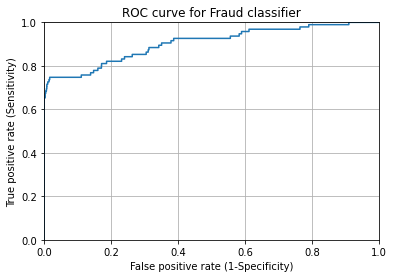

ROC Curve Score: 0.9041562884103871


In [139]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Fraud classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

roc_score=roc_auc_score(y_test,y_pred_prob_yes[:,1])

plt.show()
print("ROC Curve Score:", roc_score)

A common way to visualize the trade-offs of different thresholds is by using an ROC curve, which is a plot of the true positive rate versus the false positive rate for all possible choices of thresholds. A model with good classification accuracy should have significantly more true positives than false positives at all thresholds. The optimum position for roc curve is towards the top left corner where the specificity and sensitivity are at optimum levels.

The area under the ROC curve quantifies model classification accuracy. The higher the area, the greater the disparity between true and false positives. Also means model is stronger in classifying members of the training dataset. An area of 0.5 corresponds to a model that performs not good and an area of 1 is ideal.